In [1]:
"""
shap demo
"""

'\nshap demo\n'

In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np

In [68]:
from sklearn.externals import joblib

In [4]:
df_train = pd.read_csv("train_data.csv")
df_test = pd.read_csv("test_data.csv")

In [5]:
feature_name = sorted(df_train.columns[1:])

In [6]:
df_train[:5]

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28
0,1,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.092,0.000,...,-0.010,-0.046,3.102,1.354,0.980,0.978,0.920,0.722,0.989,0.877
1,1,0.908,0.329,0.359,1.498,-0.313,1.096,-0.558,-1.588,2.173,...,-1.139,-0.001,0.000,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1,0.799,1.471,-1.636,0.454,0.426,1.105,1.282,1.382,0.000,...,1.129,0.900,0.000,0.910,1.108,0.986,0.951,0.803,0.866,0.780
3,0,1.344,-0.877,0.936,1.992,0.882,1.786,-1.647,-0.942,0.000,...,-0.678,-1.360,0.000,0.947,1.029,0.999,0.728,0.869,1.027,0.958
4,1,1.105,0.321,1.522,0.883,-1.205,0.681,-1.070,-0.922,0.000,...,-0.374,0.113,0.000,0.756,1.361,0.987,0.838,1.133,0.872,0.808


In [7]:
y_train = df_train["label"]
y_test = df_test["label"]

x_train = df_train[feature_name]
x_test = df_test[feature_name]

In [69]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.1,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.25,
    'lambda_l2': 0.25,
    'verbose': 0,
    'n_estimators': 5000,
    'category_feature': ['feature_20'],  # 指定类别特征
    'n_jobs': 32
}

In [71]:
lgb_model = lgb.LGBMClassifier(**params)

lgb_model.fit(x_train, 
              y_train, 
              eval_set = [(x_train, y_train), (x_test, y_test)], 
              early_stopping_rounds=50, 
              feature_name = feature_name)

[1]	training's auc: 0.756295	valid_1's auc: 0.732545
Training until validation scores don't improve for 50 rounds
[2]	training's auc: 0.78229	valid_1's auc: 0.759691
[3]	training's auc: 0.793269	valid_1's auc: 0.757941
[4]	training's auc: 0.799875	valid_1's auc: 0.755474
[5]	training's auc: 0.806587	valid_1's auc: 0.767294
[6]	training's auc: 0.813326	valid_1's auc: 0.781024
[7]	training's auc: 0.817833	valid_1's auc: 0.788724
[8]	training's auc: 0.81989	valid_1's auc: 0.786176
[9]	training's auc: 0.826123	valid_1's auc: 0.792505
[10]	training's auc: 0.830808	valid_1's auc: 0.801882
[11]	training's auc: 0.835322	valid_1's auc: 0.805502
[12]	training's auc: 0.836802	valid_1's auc: 0.802019
[13]	training's auc: 0.839784	valid_1's auc: 0.801535
[14]	training's auc: 0.841557	valid_1's auc: 0.803776
[15]	training's auc: 0.844406	valid_1's auc: 0.80755
[16]	training's auc: 0.845811	valid_1's auc: 0.804486
[17]	training's auc: 0.84752	valid_1's auc: 0.804696
[18]	training's auc: 0.850039	vali

LGBMClassifier(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
        category_feature=['feature_20'], class_weight=None,
        colsample_bytree=1.0, feature_fraction=0.8,
        importance_type='split', lambda_l1=0.25, lambda_l2=0.25,
        learning_rate=0.1, max_depth=-1, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=5000, n_jobs=32, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
        verbose=0)

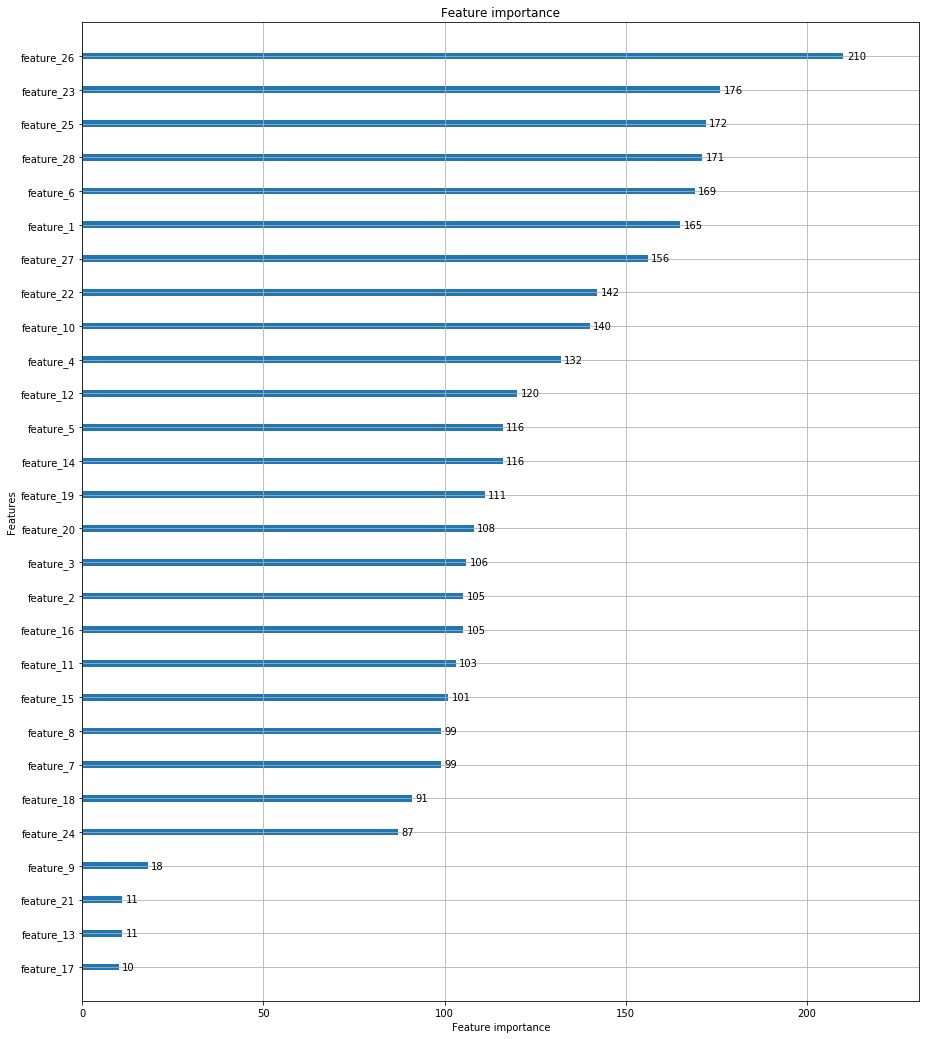

In [72]:
lgb.plot_importance(lgb_model, figsize=(15,18))

## save and load model

In [73]:
# save model
lgb_model.booster_.save_model("model")

In [45]:
# load model
bst = lgb.Booster(model_file="model")

In [83]:
bst.predict(x_train, raw_score=True).mean()

0.17578478546846008

In [74]:
# sklearn save model
joblib.dump(lgb_model, "model.pkl")

['model.pkl']

In [75]:
# sklearn load model
lgb_model = joblib.load("model.pkl")

In [76]:
lgb_model.predict(x_train, raw_score=True).mean()

0.17578478546846008

## shap

In [77]:
import shap

In [78]:
explainer = shap.TreeExplainer(lgb_model)

In [79]:
# shap基准值
explainer.expected_value

0.17326897657403834

In [97]:
shap_values = explainer.shap_values(x_test[:50]) # 输出是2个矩阵，因为lightgbm会输出两个概率值，分别表示取0和取1的概率

/anaconda3/lib/python3.6/site-packages/shap/explainers/tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [98]:
shap_values[0]

array([[ 0.0139459 ,  0.00770638, -0.01611959, ..., -0.04453794,
        -0.00850746, -0.00110085],
       [-0.22168968,  0.06396078,  0.30597166, ..., -0.0053941 ,
         0.08674044,  0.01493003],
       [-0.05063347,  0.05635937, -0.03508243, ..., -0.02128064,
         0.01667259, -0.00104836],
       ...,
       [-0.0940753 ,  0.16174937,  0.02590063, ...,  0.01200209,
         0.01374774, -0.010221  ],
       [-0.19738653, -0.2505967 ,  0.01862071, ...,  0.02223836,
         0.0719716 , -0.02720815],
       [ 0.10386231, -0.06385735, -0.07433812, ...,  0.10790309,
        -0.08249309,  0.01954728]])

In [99]:
shap_values[1]

array([[-0.0139459 , -0.00770638,  0.01611959, ...,  0.04453794,
         0.00850746,  0.00110085],
       [ 0.22168968, -0.06396078, -0.30597166, ...,  0.0053941 ,
        -0.08674044, -0.01493003],
       [ 0.05063347, -0.05635937,  0.03508243, ...,  0.02128064,
        -0.01667259,  0.00104836],
       ...,
       [ 0.0940753 , -0.16174937, -0.02590063, ..., -0.01200209,
        -0.01374774,  0.010221  ],
       [ 0.19738653,  0.2505967 , -0.01862071, ..., -0.02223836,
        -0.0719716 ,  0.02720815],
       [-0.10386231,  0.06385735,  0.07433812, ..., -0.10790309,
         0.08249309, -0.01954728]])

In [100]:
shap_values = shap_values[1]
expected_value = explainer.expected_value[1]

In [101]:
# 单个样本的特征贡献度
j = 0
shap.initjs()
shap.force_plot(expected_value, shap_values[j], x_test.iloc[j])

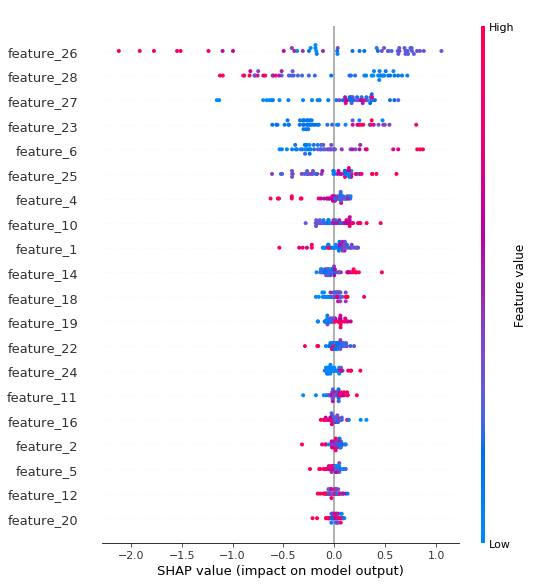

In [103]:
# 点越红，数值越大
shap.summary_plot(shap_values, x_test[:50])

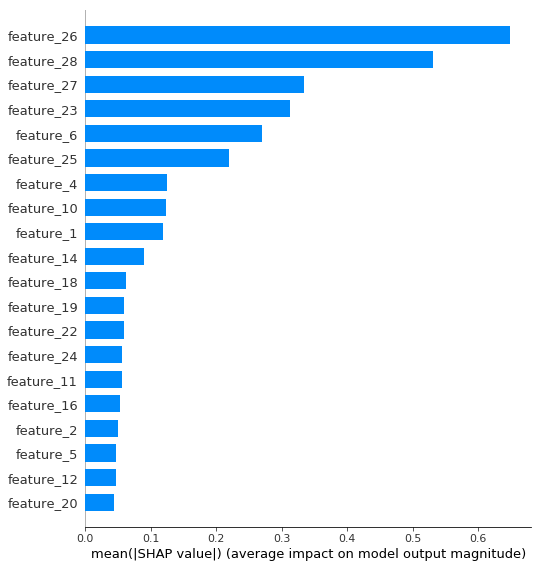

In [104]:
# 另一种特征重要性排序方法
shap.summary_plot(shap_values, x_test[:50], plot_type="bar")

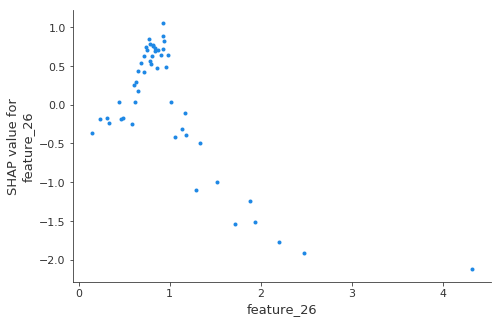

In [107]:
col = "feature_26"
shap.dependence_plot(col, shap_values, x_test[:50], interaction_index=None, show=False)